## 0. Computer vision libraries in PyTorch

- `torchvision` - base domain library for PyTorch computer vision
- `torchvision.datasets` - get pretrained computer vision models that you can leverage for your own problems
- `torchvision.transforms` - functions for manipulating your vision data (images) to be suitable for use with an ML model
- `torch.utlis.data.Dataset` - Base dataset class for PyTorch
- `torch.utlis.data.DataLoader` - Creates a Python iterable over a dataset



In [ ]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check the versions
print(torch.__version__)
print(torchvision.__version__)

2.6.0+cu124
0.21.0+cu124


## 1. Getting a dataset

The Dataset we'll be using is FashionMNIST from torchvison.datasets

In [ ]:
# Setup the training data
from torchvision import datasets
train_data = datasets.FashionMNIST(
    root="data", # where to download the data to?
    train=True, # do we want the training dataset?
    download=True,  # do we want to download yes/no?
    transform=torchvision.transforms.ToTensor(),  # how do we want to transform the data?
    target_transform=None,  # how do we want to transform the labels/targets?
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)


100%|██████████| 26.4M/26.4M [00:01<00:00, 16.9MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 273kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 4.46MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 17.4MB/s]


In [ ]:
len(train_data), len(test_data)

(60000, 10000)

In [ ]:
# See the first training example
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
# Identify the classes
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
# Convert the classes into index
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
# Identify the targets
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

### 1.1 Check input and output shapes of data

In [ ]:
# Check the shape of our image
print(f"Image shape: {image.shape} -> [color_channels, height, width]")
print(f"Image label: {class_names[label]}")

Image shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Image label: Ankle boot


In [ ]:
image.shape

torch.Size([1, 28, 28])

### 1.2 Visualizing our data

Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, 'Ankle boot :  9')

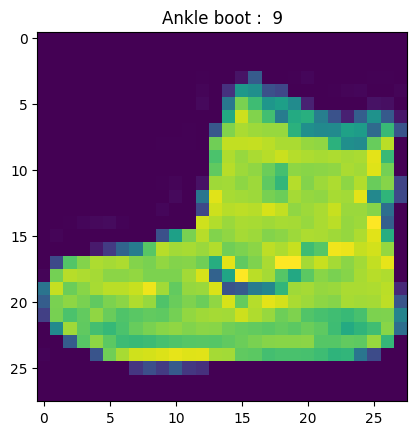

In [ ]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(f"{class_names[label]} :  {label}")

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

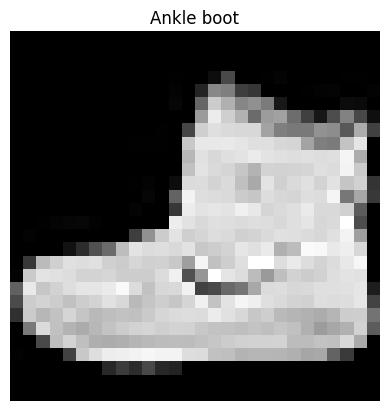

In [ ]:
# Change the image to gray scale
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label]);
plt.axis(False)

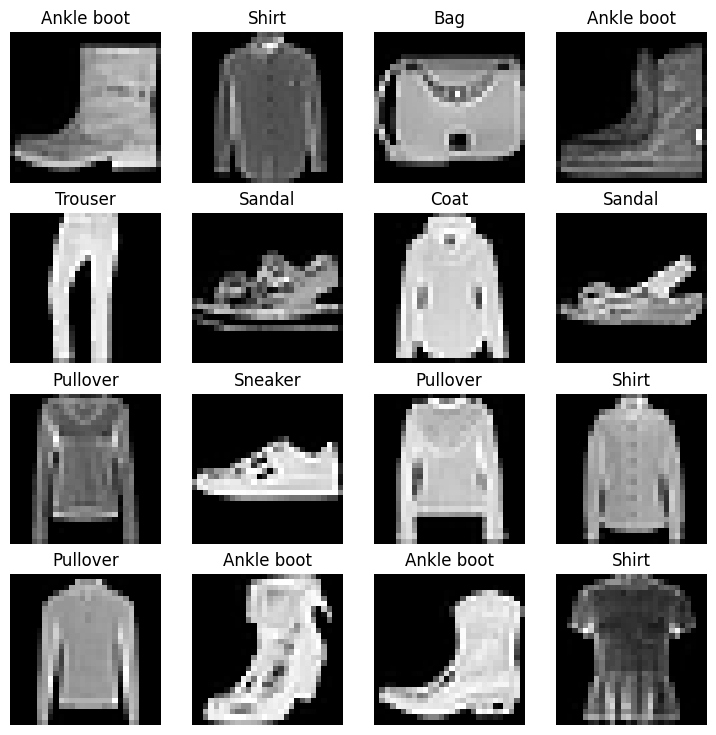

In [ ]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False);

Do you think these items of clothing (images) could be modelled with pure linear lines? Or do you think we'll need non-linearity?

In [ ]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

## 2. Prepare DataLoader

Right now , or data is in the form of PyTorch Datasets.

DataLoader turns our dataset into Python iterables.

More specifically, we want to turn our data into batches (or mini-batches).config/

Why would we do this?

1. It is more computationally efficient,as in, your computing hardware may not be able to look (store in memeory) at 60000 images in one hit. So we break it down to 32 images at a time (batch size of 32).
2.It gives our neural network more chances to update its gradients per epoch.


In [ ]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7971c7c47f50>,
 <torch.utils.data.dataloader.DataLoader at 0x7971c7baf0d0>)

In [ ]:
 # Let's check out what we've created
print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}...")
print(f"Lenght of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x7971c7c47f50>, <torch.utils.data.dataloader.DataLoader object at 0x7971c7baf0d0>)
Length of train_dataloader: 1875 batches of 32...
Lenght of test_dataloader: 313 batches of 32


In [ ]:
# Check what's inside the training dataloader
train_features_batch , train_labels_batch  = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 8, label size: torch.Size([])


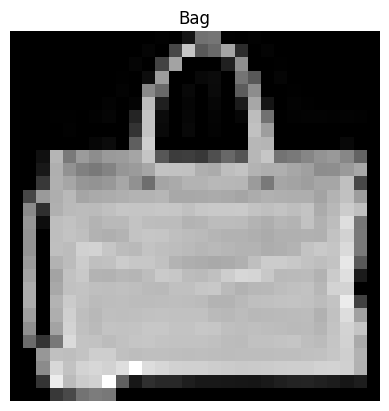

In [ ]:
# Show a Sample
# torch.manual_seed(42)
random_idx  = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

## 3. Model 0: Build a Baseline Model

When starting to build a series of machine learning modelling experiments, it's best practice to start with a basline model.

A baseline model is a simple model you will try and improve upon with subsequent model/experiments.

In other words: start simply and add complexity when necessary.

In [ ]:
# Create a flattern layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x)

# Print out what's happen
print(f"Shape before flattening: {x.shape} -> [color_channels, weight, height]")
print(f"Shape after flattening: {output.shape} -> [color_channels, weight*height]")

Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, weight, height]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, weight*height]


In [ ]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,
                      out_features=hidden_units),
            nn.Linear(in_features=hidden_units,
                      out_features=output_shape),
        )

    def forward(self, x):
        return self.layer_stack(x)


In [ ]:
torch.manual_seed(42)

# Setup model with input parameters
model_0 = FashionMNISTModelV0(
    input_shape = 784, # this is 28*28
    hidden_units=10,
    output_shape = len(class_names) # one for every class
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
dummy_x = torch.rand([1, 1, 28, 28])
print(model_0(dummy_x).shape)
model_0(dummy_x)

torch.Size([1, 10])


tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

### 3.1 Setup loss, optimizer and evaluation matrics

- Loss function - Since, we're working with multu-class classification data, our loss function will be `nn.CrossEntropyLoss()`
- Optimizer  - `torch.optim.SGD()` (Stochastic Gradient)
- Evaluation metric - since we're working on classification problem, let's use accuracy as our evaluation metric

In [ ]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch Repo
if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists, skipping download...")
else:
    print("Downloading helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)


In [ ]:
# Import accuracy metrics
from helper_functions import accuracy_fn

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr=0.1)

## 3.2 Creatin a function to time our experiments

Machine learning is very experminetal.

Two of the main things you'll oftern want to track are:

1. Model's Performance of default timer as timer.
2. How fast it runs

In [ ]:
from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
    """ Prints differnece between start and end time."""
    total_time = end-start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [ ]:
start_time  = timer()
#some code
end_time = timer()
print_train_time(start=start_time, end=end_time, device="cpu")

Train time on cpu: 0.000 seconds


0.0002093149999780053

 ### 3.3 Creating a training loop and training a model on batches of data

 1. Loop through epochs.
 2. Loop through training batches, perform training steps, calculate the train loss per batch.
 3. Loop through testing batches, perform testing steps, calculate the test loss per batch.
 4. Print out what's happening.
 5. Time it all.

In [ ]:
X, y = next(iter(train_dataloader.dataset))
len(X)

1

In [ ]:
from tqdm.auto import tqdm # progress bar

torch.manual_seed(42)
train_time_start_cpu = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
    print("Epoch", epoch)
    train_loss = 0

    for batch , (X, y) in enumerate(train_dataloader):
        model_0.train()
        y_pred = model_0(X)

        loss = loss_fn(y_pred, y)
        train_loss += loss

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")


    train_loss /= len(train_dataloader)


    # Testing
    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:
            test_pred = model_0(X)

            test_loss += loss_fn(test_pred, y)
            test_acc  += accuracy_fn(y_true=y,
                                     y_pred=test_pred.argmax(dim=1))

        test_loss /= len(test_dataloader)
        test_acc /= len(test_dataloader)

    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_cpu,
                                            end=train_time_end_on_cpu,
                                            device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 0
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.59039 | Test loss: 0.50954, Test acc: 82.04%

Epoch 1
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.47633 | Test loss: 0.47989, Test acc: 83.20%

Epoch 2
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.45503 | Test loss: 0.47664, Test acc: 83.43%

Train time on cpu: 32.198 seconds


###4. Make Predicitions and get model0 results

In [ ]:
torch.manual_seed(42)
def eval_model(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            y_pred = model(X)

            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y,
                               y_pred=y_pred.argmax(dim=1))

        loss/=len(data_loader)
        acc/=len(data_loader)

    return {"model_name": model.__class__.__name__,
            "model_loss": loss.item(),
            "model_acc": acc}

# Calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

## 5. Setup device agnostic code(for using a GPU if there is one)

In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
torch.cuda.is_available()

False

In [ ]:
# Setup device agnostic code
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

### 6. Model 1: Building the above model with non-linearity

In [ ]:
from torch import nn
class FashionMNISTModelV1(nn.Module):
    def __init__(self, input_shape:int,
                output_shape:int,
                hidden_units:int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU(),
        )

    def forward(self, x):
        return self.layer_stack(x)

In [ ]:
torch.manual_seed(42)
model_1 =FashionMNISTModelV1(input_shape=784,
                            hidden_units=10,
                            output_shape=len(class_names)).to(device)
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

In [ ]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

### Make a functions for train and test step

In [ ]:
def train_step(model: torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device:torch.device=device):

    train_loss, train_acc = 0, 0
    model.to(device)
    for batch, (X, y) in enumerate(data_loader):
        X, y = X.to(device), y.to(device)

        # Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1))

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer.step
        optimizer.step()

    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc: .2f}%")


def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.ModuleList,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):

    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval()

    with torch.inference_mode():
        for X, y in data_loader:
            X, y = X.to(device), y.to(device)

            #1. Forward pass
            test_pred = model(X)

            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                                    y_pred=test_pred.argmax(dim=1)
                                    )

        # Adjust the metrices and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%")



In [ ]:
torch.manual_seed(42)

from timeit import default_timer as timer
train_time_start_on_gpu = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n----------")
    train_step(data_loader=train_dataloader,
               model=model_1,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn)
    test_step(data_loader=test_dataloader,
              model=model_1,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn)

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
----------
Train loss: 1.09199 | Train accuracy:  61.34%
Test loss: 0.95636 | Test accuracy: 65.00%
Epoch: 1
----------
Train loss: 0.78101 | Train accuracy:  71.93%
Test loss: 0.72227 | Test accuracy: 73.91%
Epoch: 2
----------
Train loss: 0.67027 | Train accuracy:  75.94%
Test loss: 0.68500 | Test accuracy: 75.02%
Train time on cpu: 34.224 seconds


In [ ]:
# torch.manual_seed(42)

# model_1_results = eval_model(model=model_1,
#                             data_loader=test_dataloader,
#                             loss_fn=loss_fn,
#                             accuracy_fn=accuracy_fn)

# model_1_results

In [ ]:
# Because the above eval_model() is used for cpu only, to use to for gpu purposes then we convert into device agnostic code

### Eval model with device agnostic code

In [ ]:
torch.manual_seed(42)
def eval_model(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               accuracy_fn,
               device:torch.device=device):

    loss, acc =0 , 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

        # Scale loss and accuracy
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name":model.__class__.__name__,
            "model_loss":loss.item(),
            "model_acc":acc}

model_1_results = eval_model(model=model_1, data_loader=test_dataloader,
                             loss_fn=loss_fn, accuracy_fn=accuracy_fn,
                             device=device)
print("Model with non_linearity")
model_1_results

Model with non_linearity


{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850009560585022,
 'model_acc': 75.01996805111821}

In [ ]:
print("Model with Linearity")
model_0_results

Model with Linearity


{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

## Model 2: Building a Convolutional Neral Networks(CNN)

CNN's are also known ConvNets.

CNN's are known for their capabilities to find patterns in visual Data.

In [ ]:
# Create a Convolutional Neural Network
class FashionMNISTModelV2(nn.Module):
    """
    Model architecture copying from TinyVGG
    """
    def __init__(self, input_shape:int, hidden_units:int, output_shape:int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3, # also called as filter
                      stride=1, # the step size by which the kernel/filter will move across the input image
                      padding=1),

            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2),
        )

        self.block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),

            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride size is same as kernel size
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7, # There is a trick to this
            out_features=output_shape))

    def forward(self, x:torch.Tensor):
        x = self.block_1(x)
        # print(x.shape)
        x = self.block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x


torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1, # input shape is one , because we are only using one colour channel(black)
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)

model_2

FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
rand_image_tensor = torch.randn(size=(1, 28, 28))
rand_image_tensor.shape

torch.Size([1, 28, 28])

In [ ]:
model_2(rand_image_tensor.unsqueeze(0).to(device))

tensor([[-0.1974,  0.0511, -0.0374, -0.0911,  0.0668, -0.0553,  0.0706, -0.0423,
         -0.0182,  0.1604]], grad_fn=<AddmmBackward0>)

In [ ]:
###7.1 Stepping through
torch.manual_seed(42)

# Create a sample batch of random numbers with same size as image batch
images = torch.randn(size=(32, 3, 64, 64)) # batch size, color_channels, height, width
test_image = images[0]

print(f"Image batch shape: {images.shape} -> [batch_size, color_channels, height, width]" )
print(f"Single images shape: {test_image.shape} -> [color_channels, height, width]")
print(f"Single image pixel values: {test_image}")

Image batch shape: torch.Size([32, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Single images shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Single image pixel values: tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609

In [ ]:
torch.manual_seed(42)

# Create a convolutional layer with same dimensions as TinyVGG
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=0)

# conv_layer(test_image)
print(conv_layer(test_image.unsqueeze(0)).shape , "batch_size, colour_channels, height, width" )

torch.Size([1, 10, 62, 62]) batch_size, colour_channels, height, width


In [ ]:
# Shapes of weight and biases
print(f"conv_layer weight shape: {conv_layer.weight.shape}")
print(f"conv_layer bias shape: {conv_layer.bias.shape}")

conv_layer weight shape: torch.Size([10, 3, 3, 3])
conv_layer bias shape: torch.Size([10])


In [ ]:
# Print out original image shape without and with unsqueezed dimensions
print(f"Test image original shape: {test_image.shape}")
print(f"Test image with unsqueezed dimension: {test_image.unsqueeze(dim=0).shape}")

# Create a sample nn.MaxPool2d() layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass the data through the conv_layer
test_image_through_conv_layer = conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape after going through conv_layer(): {test_image_through_conv_layer.shape}")

# pass through max pool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv_layer)
print(f"Shape after going through conv_layer() and max_pool() layer: {test_image_through_conv_and_max_pool.shape}")

Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])
Shape after going through conv_layer(): torch.Size([1, 10, 62, 62])
Shape after going through conv_layer() and max_pool() layer: torch.Size([1, 10, 31, 31])


In [ ]:
torch.manual_seed(42)

# create a random tensor with a similar number of dimensions as our images
random_tensor = torch.randn(size=(1, 1, 2, 2))
print(f"Random Tensor:\n{random_tensor}")
print(f"Random tensor shape:\n {random_tensor.shape}")

# Create a max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# pass the random tensor through the max_pool_layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f"Max pool tensor:\n {max_pool_tensor} <- maximum value of spatial space or feature map")
print(f"Max pool tensor shape: {max_pool_tensor.shape}")

Random Tensor:
tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random tensor shape:
 torch.Size([1, 1, 2, 2])
Max pool tensor:
 tensor([[[[0.3367]]]]) <- maximum value of spatial space or feature map
Max pool tensor shape: torch.Size([1, 1, 1, 1])


In [ ]:
# Trying using nn.AvgPool2d()
torch.manual_seed(42)

random_tensor = torch.rand(size=(1, 1, 2, 2))
print(f"Random tesnor:\n{random_tensor}")

avg_pool_layer = nn.AvgPool2d(kernel_size=2)

avg_pool_tensor = avg_pool_layer(random_tensor)
print("\n", avg_pool_tensor)
print("shape: ", avg_pool_tensor.shape)

print()

# Print out original image shape without and with unsqueezed dimensions
print(f"Test image original shape: {test_image.shape}")
print(f"Test image with unsqueezed dimension: {test_image.unsqueeze(dim=0).shape}")

# Create a sample nn.MaxPool2d() layer
avg_pool_layer = nn.AvgPool2d(kernel_size=2)

# Pass the data through the conv_layer
test_image_through_conv_layer = conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape after going through conv_layer(): {test_image_through_conv_layer.shape}")

# pass through max pool layer
test_image_through_conv_and_avg_pool = avg_pool_layer(test_image_through_conv_layer)
print(f"Shape after going through conv_layer() and avg_pool() layer: {test_image_through_conv_and_avg_pool.shape}")

Random tesnor:
tensor([[[[0.8823, 0.9150],
          [0.3829, 0.9593]]]])

 tensor([[[[0.7849]]]])
shape:  torch.Size([1, 1, 1, 1])

Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])
Shape after going through conv_layer(): torch.Size([1, 10, 62, 62])
Shape after going through conv_layer() and avg_pool() layer: torch.Size([1, 10, 31, 31])


### 7.3 Setup a loss function and optimizer for `model2`

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

In [ ]:
from helper_functions import accuracy_fn

In [ ]:
torch.manual_seed(42)

from timeit import default_timer as timer
train_time_start_model_2 = timer()

epochs=3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n----------")
    train_step(data_loader=train_dataloader,
               model=model_2,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device
            )

    test_step(data_loader=test_dataloader,
              model=model_2,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device
            )

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                            end=train_time_end_model_2,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
----------
Train loss: 0.56314 | Train accuracy:  79.79%
Test loss: 0.41075 | Test accuracy: 85.18%
Epoch: 1
----------
Train loss: 0.36577 | Train accuracy:  86.75%
Test loss: 0.34881 | Test accuracy: 87.39%
Epoch: 2
----------
Train loss: 0.32810 | Train accuracy:  88.23%
Test loss: 0.33803 | Test accuracy: 87.95%
Train time on cpu: 113.711 seconds


In [ ]:
# Evaluate our model
model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)

model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.33803191781044006,
 'model_acc': 87.94928115015975}

##8. Comparing model results
1. `model_0` - our baseline model with two `nn.Linear` layers.
2. `model_1` - the same setup as our baseline model except we add non-linearity using `nn.ReLU`
3. `model_2` - Our first CNN model that mimics TinyVGG architecture on CNN Explainer website.

In [ ]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results, model_1_results, model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.338032,87.949281


In [ ]:
# Add training time to out comparision
compare_results['training_time']= [total_train_time_model_0,
                                   total_train_time_model_1,
                                   total_train_time_model_2]

In [ ]:
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,32.198011
1,FashionMNISTModelV1,0.685001,75.019968,34.224096
2,FashionMNISTModelV2,0.338032,87.949281,113.711477


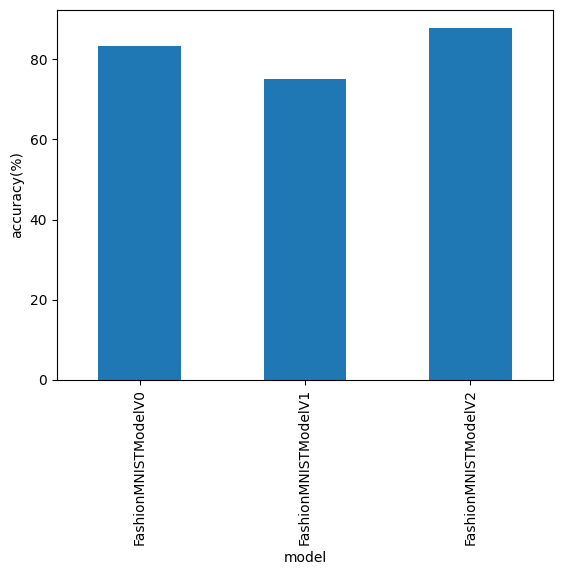

In [ ]:
# Visualize our model results
compare_results.set_index("model_name")["model_acc"].plot(kind="bar")
plt.ylabel("accuracy(%)")
plt.xlabel("model");

##9. Make and evaluate random predictions with best model

In [ ]:
def make_predictions(model: torch.nn.Module,
                      data:list,
                      device: torch.device=device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:

            sample = torch.unsqueeze(sample, dim=0).to(device)

            # forward pass
            pred_logit = model(sample)

            # Get prediction probabilities (logits -> prediction probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

            # get pred_prob off the gpu for further calculations
            # pred_probs.append(pred_probs.cpu()) # when using with GPU
            pred_probs.append(pred_prob) # Without GPU with CPU


    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)

In [ ]:
import random
random.seed(42)
test_samples = []
test_labels= []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)


for i in range(9):
    print(f"Test sample image shape: {test_samples[i].shape}\nTest sample label: {test_labels[i]} ({class_names[test_labels[i]]})")

Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 5 (Sandal)
Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 1 (Trouser)
Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 7 (Sneaker)
Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 4 (Coat)
Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 3 (Dress)
Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 0 (T-shirt/top)
Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 4 (Coat)
Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 7 (Sneaker)
Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 1 (Trouser)


In [ ]:
# Make predictions on test samples with model_2
pred_probs = make_predictions(model=model_2,
                              data=test_samples)

pred_probs[:]

tensor([[9.7936e-08, 2.3817e-08, 3.0853e-08, 2.6187e-07, 2.8081e-08, 9.9872e-01,
         3.7231e-06, 4.6517e-05, 1.8830e-05, 1.2059e-03],
        [7.8758e-02, 6.1314e-01, 3.4718e-03, 1.1854e-01, 5.5254e-02, 1.7532e-03,
         1.2398e-01, 1.3273e-03, 3.0036e-03, 7.7373e-04],
        [1.9450e-05, 3.5179e-07, 4.6479e-06, 2.6914e-05, 1.8061e-05, 2.2960e-03,
         6.1283e-05, 8.6981e-01, 1.4203e-03, 1.2635e-01],
        [1.8756e-03, 2.6486e-04, 1.7558e-01, 7.8068e-04, 8.1522e-01, 4.1331e-06,
         6.1628e-03, 2.4764e-06, 1.0805e-04, 6.4320e-06],
        [7.9201e-02, 4.5544e-04, 4.5080e-04, 9.0925e-01, 1.7177e-03, 1.2289e-05,
         8.4085e-03, 7.3196e-05, 3.3539e-04, 9.1605e-05],
        [8.2222e-01, 2.8150e-05, 2.2053e-04, 4.0437e-03, 1.3236e-03, 7.5113e-07,
         1.7163e-01, 2.0444e-06, 5.3546e-04, 1.6484e-07],
        [1.1199e-04, 5.7921e-05, 1.0777e-02, 1.3958e-05, 9.7628e-01, 2.7084e-06,
         1.2572e-02, 5.9100e-07, 1.7710e-04, 1.0900e-05],
        [1.0946e-05, 1.2288

In [ ]:
# Turn the predicition probabilties into prediction labels by taking the argmax
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])

In [ ]:
# prediction labels vs test labels
test_labels, pred_classes

([5, 1, 7, 4, 3, 0, 4, 7, 1], tensor([5, 1, 7, 4, 3, 0, 4, 7, 1]))

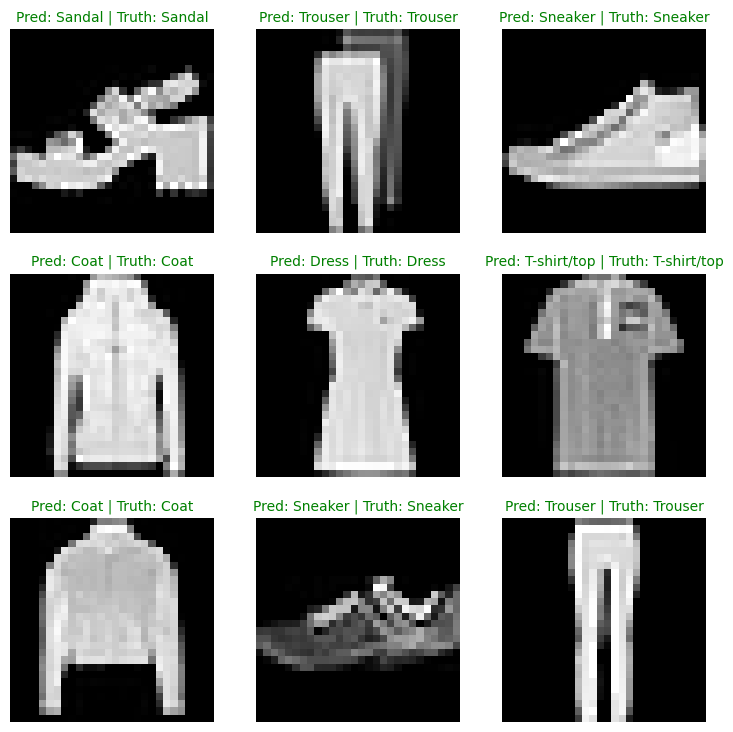

In [ ]:
# Plot predicitions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
    # Create a subplot
    plt.subplot(nrows, ncols, i+1)

    # Plot the target image
    plt.imshow(sample.squeeze(), cmap="gray")

    # Find the predicitions label (in text form, e.g Sandal)
    pred_label = class_names[pred_classes[i]]

    # Get the actual value (in text form e.g T-shirt)
    actual_label = class_names[test_labels[i]]

    # Create title text of plot
    title_text = f"Pred: {pred_label} | Truth: {actual_label}"

    # Check for equality and change title colour accordingly
    if pred_label == actual_label:
        plt.title(title_text, fontsize=10, c='g')
    else:
        plt.title(title_text, fontsize=10, c='r')
    plt.axis(False);

##10. Making a confusion matrix for further predicition evaluation

1. Make predictions with our trained model, model_2 ( a confusion matrix compares predicitions to true labels).

2. Make a confusion matrix using `torchmertics.ConfusionMatrix`

3. Plot the confusion matrix using `mlxtend.plotting.plot_confusion_matrix()`.

In [ ]:
from tqdm.auto import tqdm

# 1. Making predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc="Making predictions"):
        X, y = X.to(device), y.to(device)

        # forward pass
        y_logit = model_2(X)

        # Turn predicitions from logits -> predicition probabilities -> predicitions labels
        y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1)

        y_preds.append(y_pred) # for cpu
        # y_preds.append(y_pred.cpu())

y_pred_tensor = torch.cat(y_preds)

Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

In [ ]:
y_pred_tensor[:10]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
!pip install -q torchmetrics
import torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 963.5/963.5 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 87.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 69.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 49.0 MB/s eta 0:00:00


In [ ]:
import mlxtend

In [ ]:
test_data.targets.shape

torch.Size([10000])

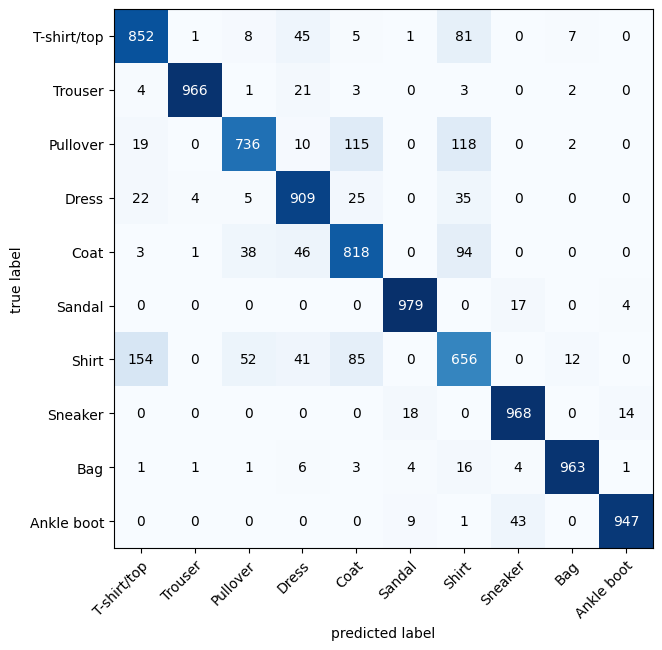

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

#2.Setup confusion matrix instance and compare predicitons to targets
confmat = ConfusionMatrix(num_classes = len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor[:10000],
                         target=test_data.targets)


# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat = confmat_tensor.numpy(), # matplotlib likes working with Numpy
    class_names=class_names, # turns the row and column labels ito class names
    figsize=(10, 7)
);

##11. Save and load the best performing model

-  `torch.save` - a function to save a whole PyTorch model or model's `state_dict`

- `torch.load` - a function to load in a saved PyTorch object

- `torch.nn.Module.load_state_dict()` - a function to load a saved `state_dict()` into an existing model instance

In [ ]:
from pathlib import Path

# Create model directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, # creates parent directories if needed
                 exist_ok = True # if models directory already exists, don't error
                 )

# Create model save path
MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH /MODEL_NAME

# Save model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),   # only saving the state_dict() only saves the learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/03_pytorch_computer_vision_model_2.pth


In [ ]:
# Create a new instance of FashionMNISTModelV2
# Note: loading model will error if the shapes here aren't the same as the saved version
loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                     hidden_units=10,
                                     output_shape=10)

# Load in the saved state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Send model to GPU
loaded_model_2 = loaded_model_2.to(device)

In [ ]:
# Evaluate the loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)

loaded_model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.33803191781044006,
 'model_acc': 87.94928115015975}

In [ ]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.33803191781044006,
 'model_acc': 87.94928115015975}

In [ ]:
# Check to seee if results are close to each other ( if they are very far away,there may be an error)
torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"]),
              atol=1e-08,
              rtol=0.0001)

tensor(True)